# session 35. Unsupervised Learning

## read dataset

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/CC%20GENERAL.csv', delimiter=',')
df.head()
#df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## dataset description

In [72]:
df.shape

(8950, 18)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [75]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


## preprocessing

In [76]:
df_new = df.drop('CUST_ID', axis = 1)
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## check missing values

In [77]:
df_new.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## imputation

In [78]:
df_new['MINIMUM_PAYMENTS'].fillna(df_new['MINIMUM_PAYMENTS'].median(), inplace=True)
df_new['CREDIT_LIMIT'].fillna(df_new['CREDIT_LIMIT'].median(), inplace=True)

In [79]:
df_new.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## scaling

In [80]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

X = df_new.astype(float).values
scaler = StandardScaler().fit(X)
X_new= scaler.transform(X)
X_new

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

## KMeans

In [81]:
from sklearn.cluster import KMeans

### elbow method
Mencari nilai k

In [82]:
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters)
    kmeans_model.fit(X_new)
    inertia_list.append(kmeans_model.inertia_)
    print("For n_clusters = {}, inertia value is {})".format(num_clusters, kmeans_model.inertia_))

For n_clusters = 1, inertia value is 152149.99999999997)
For n_clusters = 2, inertia value is 127784.45694331267)
For n_clusters = 3, inertia value is 111974.02071231528)
For n_clusters = 4, inertia value is 99061.93984229019)
For n_clusters = 5, inertia value is 91491.13569357563)
For n_clusters = 6, inertia value is 84825.0742144269)
For n_clusters = 7, inertia value is 79506.47164255002)
For n_clusters = 8, inertia value is 74486.71582841156)
For n_clusters = 9, inertia value is 71427.36338131885)
For n_clusters = 10, inertia value is 66451.00716108926)


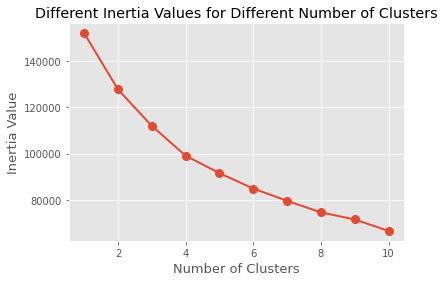

In [83]:
plt.plot(range(1,11),inertia_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters")
plt.show()

In [84]:
pip install kneed

In [85]:
from kneed import KneeLocator, DataGenerator
kneedle = KneeLocator(range(1,11),inertia_list, S=1.0, curve='convex', direction='decreasing')
print(round(kneedle.knee, 3))
print(round(kneedle.elbow, 3))

4
4


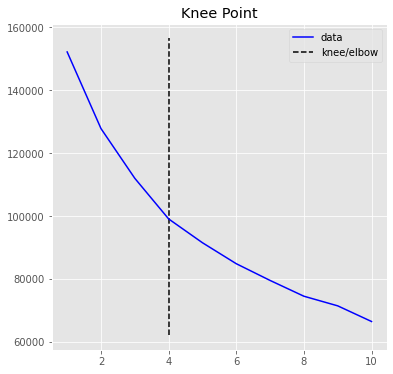

In [86]:
plt.style.use('ggplot')
#kneedle.plot_knee_normalized()
kneedle.plot_knee()

# sampai di stage ini kita mendapatkan k=4 yg optimal
# reference
# https://www.kaggle.com/kevinarvai/knee-elbow-point-detection

### silhouette method
untuk mencari nilai k

In [87]:
from sklearn.metrics import silhouette_samples, silhouette_score

sh_list = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(X_new)
   
    score = silhouette_score(X_new, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.20990375525327423)
For n_clusters = 3, silhouette score is 0.25098792290537314)
For n_clusters = 4, silhouette score is 0.1979789027083201)
For n_clusters = 5, silhouette score is 0.19327119581091734)
For n_clusters = 6, silhouette score is 0.2025380361240174)
For n_clusters = 7, silhouette score is 0.21473313331622895)
For n_clusters = 8, silhouette score is 0.2218183387964519)
For n_clusters = 9, silhouette score is 0.2134207536594852)
For n_clusters = 10, silhouette score is 0.2211282563918649)


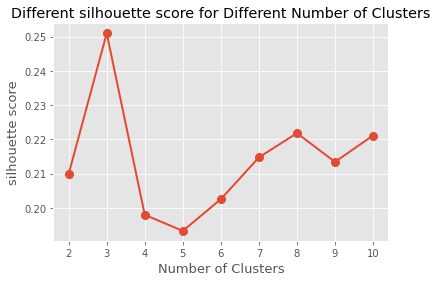

In [88]:
plt.plot(range(2,11),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Different silhouette score for Different Number of Clusters")
plt.show()
# di stage ini kita menemukan k=3 dengan score tertinggi

### kmeans

In [89]:
k_means = KMeans(n_clusters = 3, random_state = 42)
k_means.fit(X_new)
labels = k_means.labels_
df_new['cluster_labels'] = labels
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [90]:
# check centroids nya
centroids = k_means.cluster_centers_
centroids

array([[-0.36729427, -0.17990085, -0.2344699 , -0.20608337, -0.1756862 ,
        -0.30904175, -0.06655306, -0.24086634, -0.04904471, -0.33396778,
        -0.29860334, -0.24621008, -0.33707826, -0.28526042, -0.13792139,
         0.00388079, -0.02873818],
       [ 0.30403413,  0.43972786,  1.51173187,  1.26836523,  1.2438421 ,
        -0.24952597,  1.14202629,  1.56476892,  0.94331011, -0.36137307,
        -0.25287174,  1.66568851,  0.87767677,  0.82383928,  0.15681428,
         0.50383459,  0.29860839],
       [ 1.16577627,  0.34286697, -0.28944422, -0.20706299, -0.30404331,
         1.37730533, -0.64142237, -0.30659415, -0.55247711,  1.56034491,
         1.34002069, -0.36533089,  0.60025079,  0.44436861,  0.4043013 ,
        -0.4100761 , -0.12437175]])

### Visualization

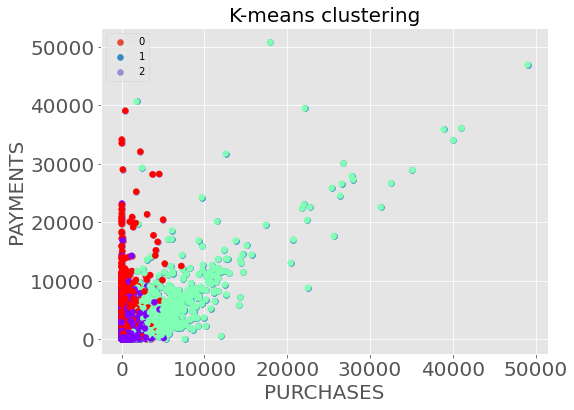

In [91]:
x1 = df_new['PURCHASES']
x2 = df_new['PAYMENTS']

plt.figure(figsize=(8,6))
u_labels = np.unique(labels) 
for i in u_labels:
    plt.scatter(x1[df_new['cluster_labels'] == i] , x2[df_new['cluster_labels'] == i] , label = i)

plt.scatter(x1,x2, c=k_means.labels_, cmap='rainbow')
plt.xlabel(x1.name,  fontsize=20)
plt.ylabel(x2.name,  fontsize=20)
plt.title('K-means clustering',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

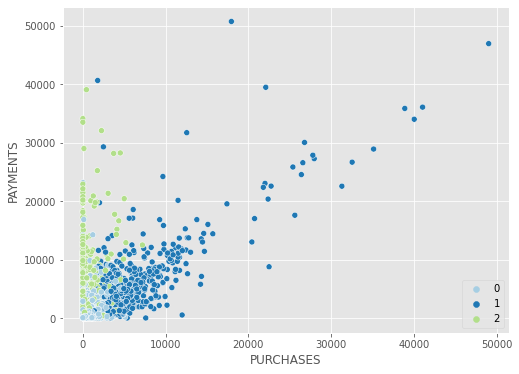

In [93]:
import seaborn as sns

plt.figure(figsize=(8,6))
x_val = 'PURCHASES'
y_val = 'PAYMENTS'
sns.scatterplot(x=x_val, y=y_val, hue='cluster_labels', data=df_new, palette='Paired')

plt.legend(loc='lower right')
plt.show()

In [94]:
import plotly.express as px

x_val = 'PURCHASES'
y_val = 'PAYMENTS'
z_val = 'BALANCE'

fig = px.scatter_3d(df_new, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

## KMedoids

In [95]:
pip install scikit-learn-extra

### elbow method
untuk mencari nilai k



In [96]:
from sklearn_extra.cluster import KMedoids

inertia_list = []
for num_clusters in range(1, 11):
    kmedoids_model = KMedoids(n_clusters=num_clusters)
    kmedoids_model.fit(X_new)
    inertia_list.append(kmedoids_model.inertia_)
    print(f"The inertia of {num_clusters} clusters : {kmedoids_model.inertia_}")

The inertia of 1 clusters : 32074.489963821223
The inertia of 2 clusters : 28502.25208383079
The inertia of 3 clusters : 26690.451996286636
The inertia of 4 clusters : 25312.68044758891
The inertia of 5 clusters : 24410.149064624216
The inertia of 6 clusters : 25045.95980573567
The inertia of 7 clusters : 23865.264137607923
The inertia of 8 clusters : 23728.76088899784
The inertia of 9 clusters : 21901.105869602237
The inertia of 10 clusters : 23064.59573814594


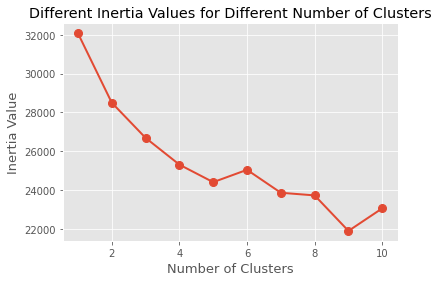

In [97]:
plt.plot(range(1,11),inertia_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters")
plt.show()

In [98]:
from kneed import KneeLocator, DataGenerator
kneedle = KneeLocator(range(1,11),inertia_list, S=1.0, curve='convex', direction='decreasing')
print(round(kneedle.knee, 3))
print(round(kneedle.elbow, 3))

4
4


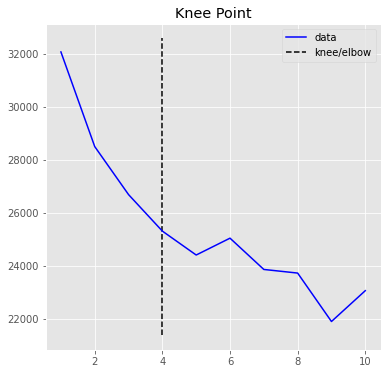

In [99]:
plt.style.use('ggplot')
#kneedle.plot_knee_normalized()
kneedle.plot_knee()

### silhouette method
untuk mencari nilai k

In [100]:
from sklearn.metrics import silhouette_samples, silhouette_score
sh_list = []
for num_clusters in range(2, 11):
    kmedoids = KMedoids(n_clusters=num_clusters)
    cluster_labels = kmedoids.fit_predict(X_new)
   
    score = silhouette_score(X_new, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.1945165537378692)
For n_clusters = 3, silhouette score is 0.16024040458444103)
For n_clusters = 4, silhouette score is 0.13738603460433335)
For n_clusters = 5, silhouette score is 0.14859330798827058)
For n_clusters = 6, silhouette score is 0.07497117420304265)
For n_clusters = 7, silhouette score is 0.051193591100429474)
For n_clusters = 8, silhouette score is 0.03912406632314492)
For n_clusters = 9, silhouette score is 0.08491760468793152)
For n_clusters = 10, silhouette score is 0.03469231089500277)


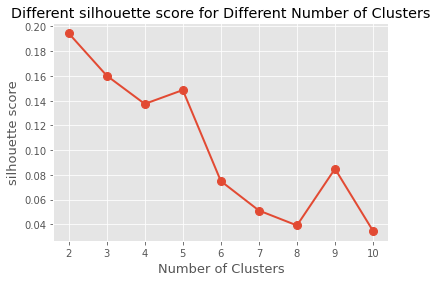

In [101]:
plt.plot(range(2,11),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Different silhouette score for Different Number of Clusters")
plt.show()


### kmedoids

In [102]:
k_medoids = KMedoids(n_clusters = 4, random_state = 42)
k_medoids.fit(X_new)
labels = k_medoids.labels_
df_new['cluster_labels'] = labels
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [103]:
centroids = k_medoids.cluster_centers_
centroids

array([[-0.73017008, -1.78447531, -0.15174467,  0.01660604, -0.3893315 ,
        -0.46678555, -0.39122513, -0.39931927, -0.49762862, -0.67534886,
        -0.47606982, -0.39063931, -0.20456068, -0.35069111, -0.32756103,
         0.50015018,  0.36067954],
       [-0.04321221,  0.51808382, -0.41993839, -0.29307072, -0.45457623,
        -0.44947139, -1.01412545, -0.39931927, -0.91699519, -0.25891333,
        -0.18299798, -0.51133325, -0.41069279, -0.47801089, -0.17593333,
        -0.52555097,  0.36067954],
       [-0.65121444,  0.51808382,  0.24224266,  0.03901242,  0.50039651,
        -0.46678555,  1.06221062,  0.15936716,  1.38951716, -0.67534886,
        -0.47606982,  0.37375564, -0.27327139,  0.0131038 , -0.2796588 ,
         0.04428414,  0.36067954],
       [ 1.16410803,  0.51808382, -0.40096824, -0.32982224, -0.3423    ,
         0.80421891, -0.18359002, -0.39931927, -0.2879466 ,  1.8232743 ,
         0.69621752, -0.350408  ,  0.41383563, -0.14385479,  0.17482124,
        -0.52555097

### Visualization

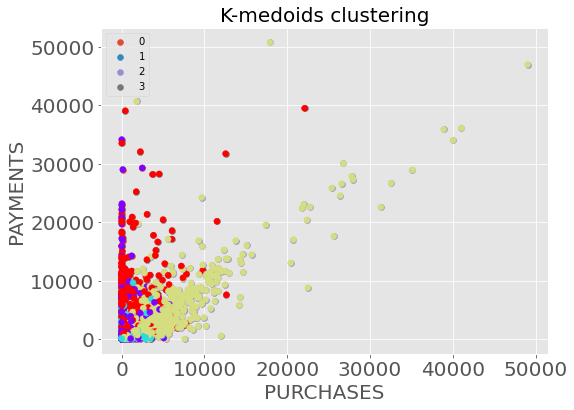

In [104]:
x1 = df_new['PURCHASES']
x2 = df_new['PAYMENTS']

plt.figure(figsize=(8,6))
u_labels = np.unique(labels) 
for i in u_labels:
    plt.scatter(x1[df_new['cluster_labels'] == i] , x2[df_new['cluster_labels'] == i] , label = i)

plt.scatter(x1,x2, c=k_medoids.labels_, cmap='rainbow')
plt.xlabel(x1.name,  fontsize=20)
plt.ylabel(x2.name,  fontsize=20)
plt.title('K-medoids clustering',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

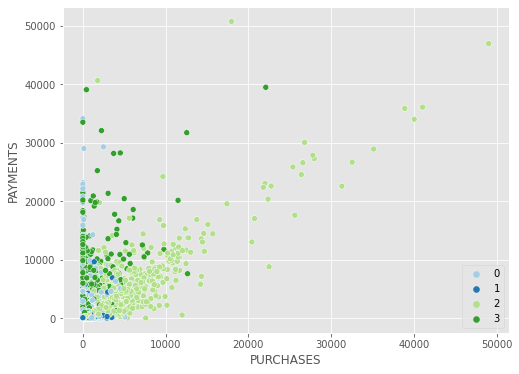

In [105]:
import seaborn as sns

plt.figure(figsize=(8,6))
x_val = 'PURCHASES'
y_val = 'PAYMENTS'
sns.scatterplot(x=x_val, y=y_val, hue='cluster_labels', data=df_new, palette='Paired')

plt.legend(loc='lower right')
plt.show()

In [106]:
import plotly.express as px

x_val = 'PURCHASES'
y_val = 'PAYMENTS'
z_val = 'BALANCE'

fig = px.scatter_3d(df_new, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

## Discussion

In [66]:
df_out = df_new.groupby(by = 'cluster_labels').sum()[['PURCHASES','PAYMENTS','BALANCE']].reset_index()
df_out

,cluster_labels,PURCHASES,PAYMENTS,BALANCE
0,0,624164.63,1.750357e+06,1.861875e+05
1,1,729117.47,2.268248e+06,3.507307e+06
2,2,6615989.42,6.562254e+06,3.576875e+06
3,3,1009411.74,4.930778e+06,6.731680e+06


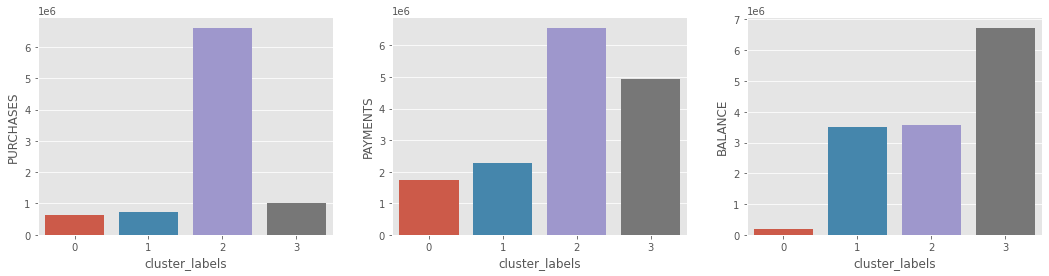

In [107]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.barplot(x= 'cluster_labels',y = 'PURCHASES', data = df_out)
plt.subplot(1,3,2)
sns.barplot(x= 'cluster_labels',y = 'PAYMENTS', data = df_out)
plt.subplot(1,3,3)
sns.barplot(x= 'cluster_labels',y = 'BALANCE', data = df_out)
plt.show()

Cluster 0 : Mempunyai jumlah terendah dalam PURCHASES, PAYMENTS dan BALANCE

Cluster 1 : Mempunyai jumlah sedang dalam PURCHASES, PAYMENTS dan BALANCE

Cluster 2 : Mempunyai jumlah tertinggi dalam PURCHASES, PAYMENTS tetapi jumlah sedang dalam BALANCE

Cluster 3 : Mempunyai jumlah sedang dalam PURCHASES, PAYMENTS tetapi jumlah tertinggi dalam BALANCE
